In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
url = 'https://drive.google.com/uc?id=1u9JBf-o8os3ekHPGqWW8WvRCT0ragnTy'
df = pd.read_csv(url)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\user\AppData\Local\Temp\ipykernel_14516\3386729631.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1   Date                                      267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(4),

In [89]:
df.rename(columns={' Estimated Unemployment Rate (%)': 'Unemployment_Rate'}, inplace=True)
df.rename(columns={"Region":"States","State":"Region"},inplace=True)

In [94]:
df['month'] = pd.DatetimeIndex(df['Date']).month


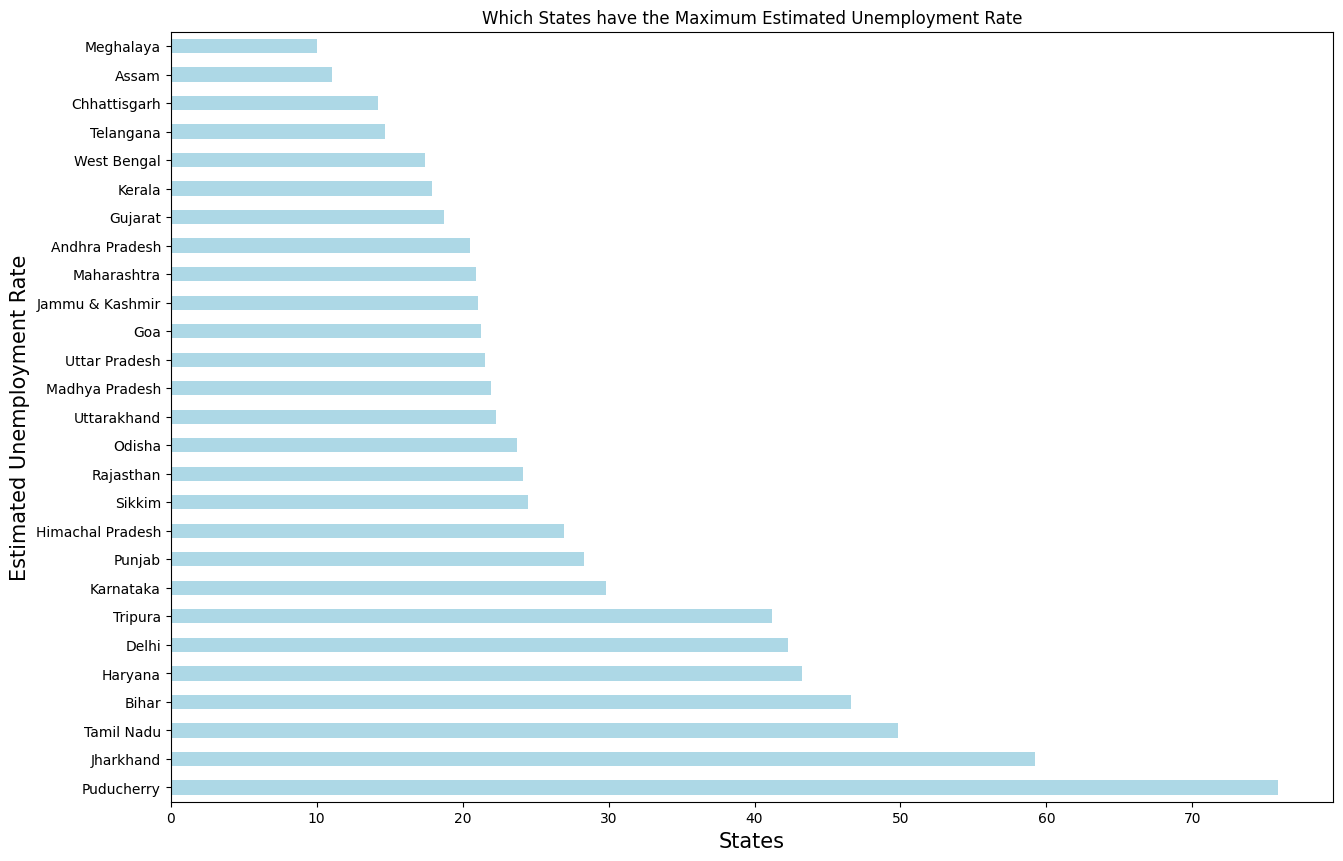

In [99]:
# Group by 'States' and get the maximum 'Estimated Unemployment Rate' for each state
group = df.groupby("States")["Unemployment_Rate"].max().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
group.plot(kind='barh', color="lightblue")

plt.xlabel("States", fontsize=15)
plt.ylabel("Estimated Unemployment Rate", fontsize=15)
plt.title("Which States have the Maximum Estimated Unemployment Rate")
plt.rcParams.update({"axes.facecolor": "black"})
plt.grid(False)
plt.show()


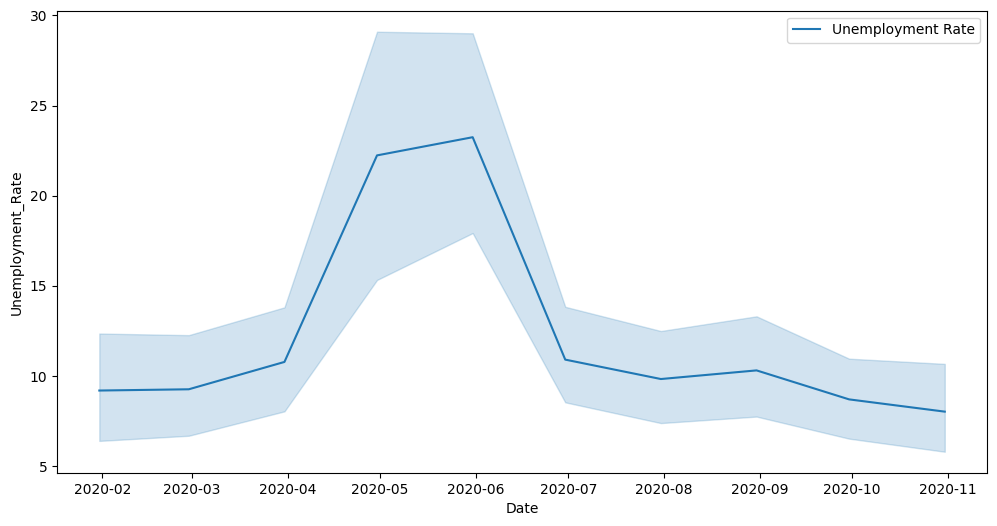

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y="Unemployment_Rate" ,data=df ,label='Unemployment Rate')
plt.legend()
plt.show()

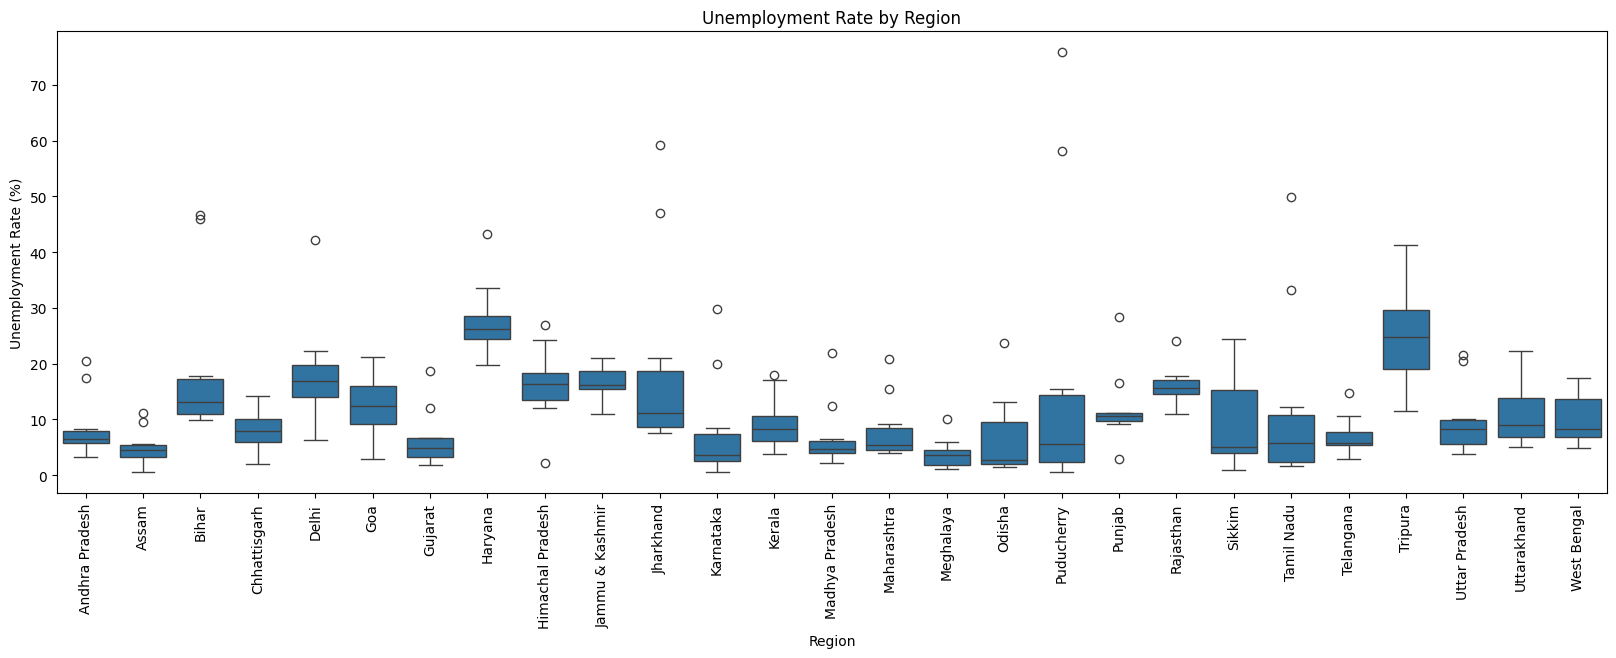

In [24]:
if 'Region' in df.columns:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x='Region', y='Unemployment_Rate', data=df)
    plt.title('Unemployment Rate by Region')
    plt.xlabel('Region')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=90)
    plt.show()

In [26]:
df['period']=np.where(df['Date'] < '2020-03-01' ,'Pre_Covid', 'During_Covid')

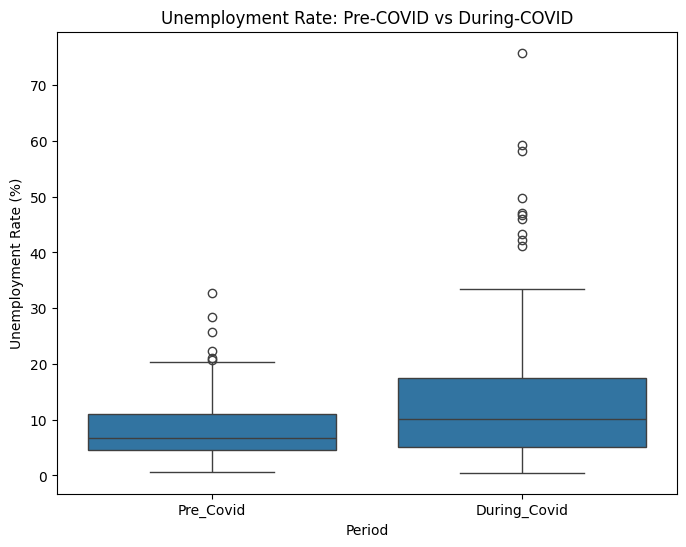

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='period',y='Unemployment_Rate',data=df)
plt.title('Unemployment Rate: Pre-COVID vs During-COVID')
plt.xlabel('Period')
plt.ylabel('Unemployment Rate (%)')
plt.show()

A narrow box indicates that the Unemployment Rate was more consistent or less variable before the pandemic. This suggests that there wasn't as much fluctuation in unemployment rates across the different regions or data points during the pre-COVID period.<br> A wide box indicates that there is more variability or spread in the Unemployment Rate during the COVID-19 period. This suggests that the unemployment rates during the pandemic varied widely across different regions or data points.

In [38]:
df['Unemployment_Change'] = df.groupby('Region')['Unemployment_Rate'].diff()

In [39]:
df

,Region,Date,Frequency,Unemployment_Rate,Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,period,Unemployment_Change
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,Pre_Covid,NaN
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,Pre_Covid,0.35
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,During_Covid,-0.04
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,During_Covid,14.72
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,During_Covid,-3.08
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,During_Covid,-10.12
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,During_Covid,-0.46
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,During_Covid,8.04
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,During_Covid,-5.52


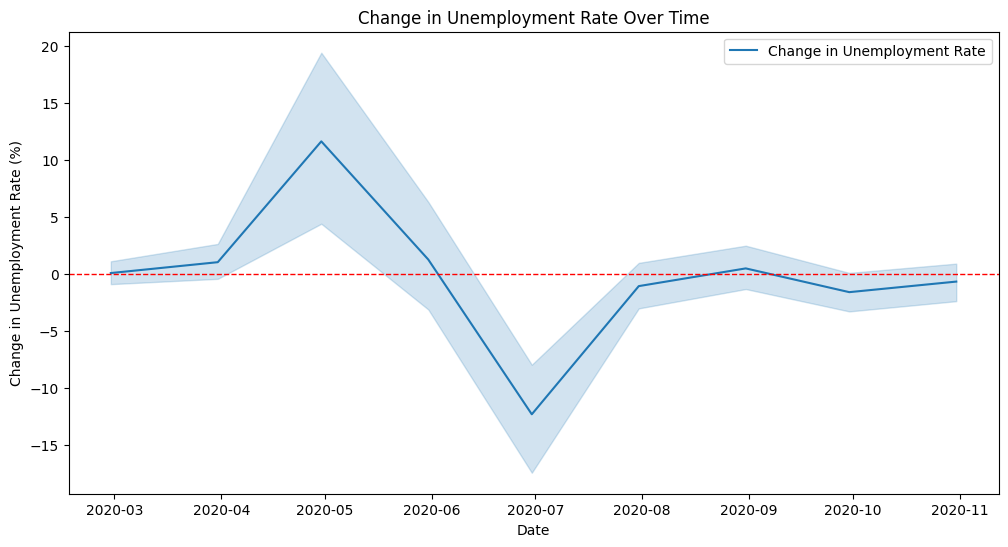

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Change', data=df, label='Change in Unemployment Rate')
plt.title('Change in Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Unemployment Rate (%)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.show()

Positive values (above the horizontal red dashed line) indicate an increase in the unemployment rate compared to the previous time period.<br>Negative values (below the horizontal red dashed line) indicate a decrease in the unemployment rate compared to the previous time period.